In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# 데이터 전처리

## 1. 탐색적 분석

In [12]:
df = pd.read_csv('../data/london_merged.csv',parse_dates=['timestamp'])

In [13]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [14]:
df.shape

(17414, 10)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


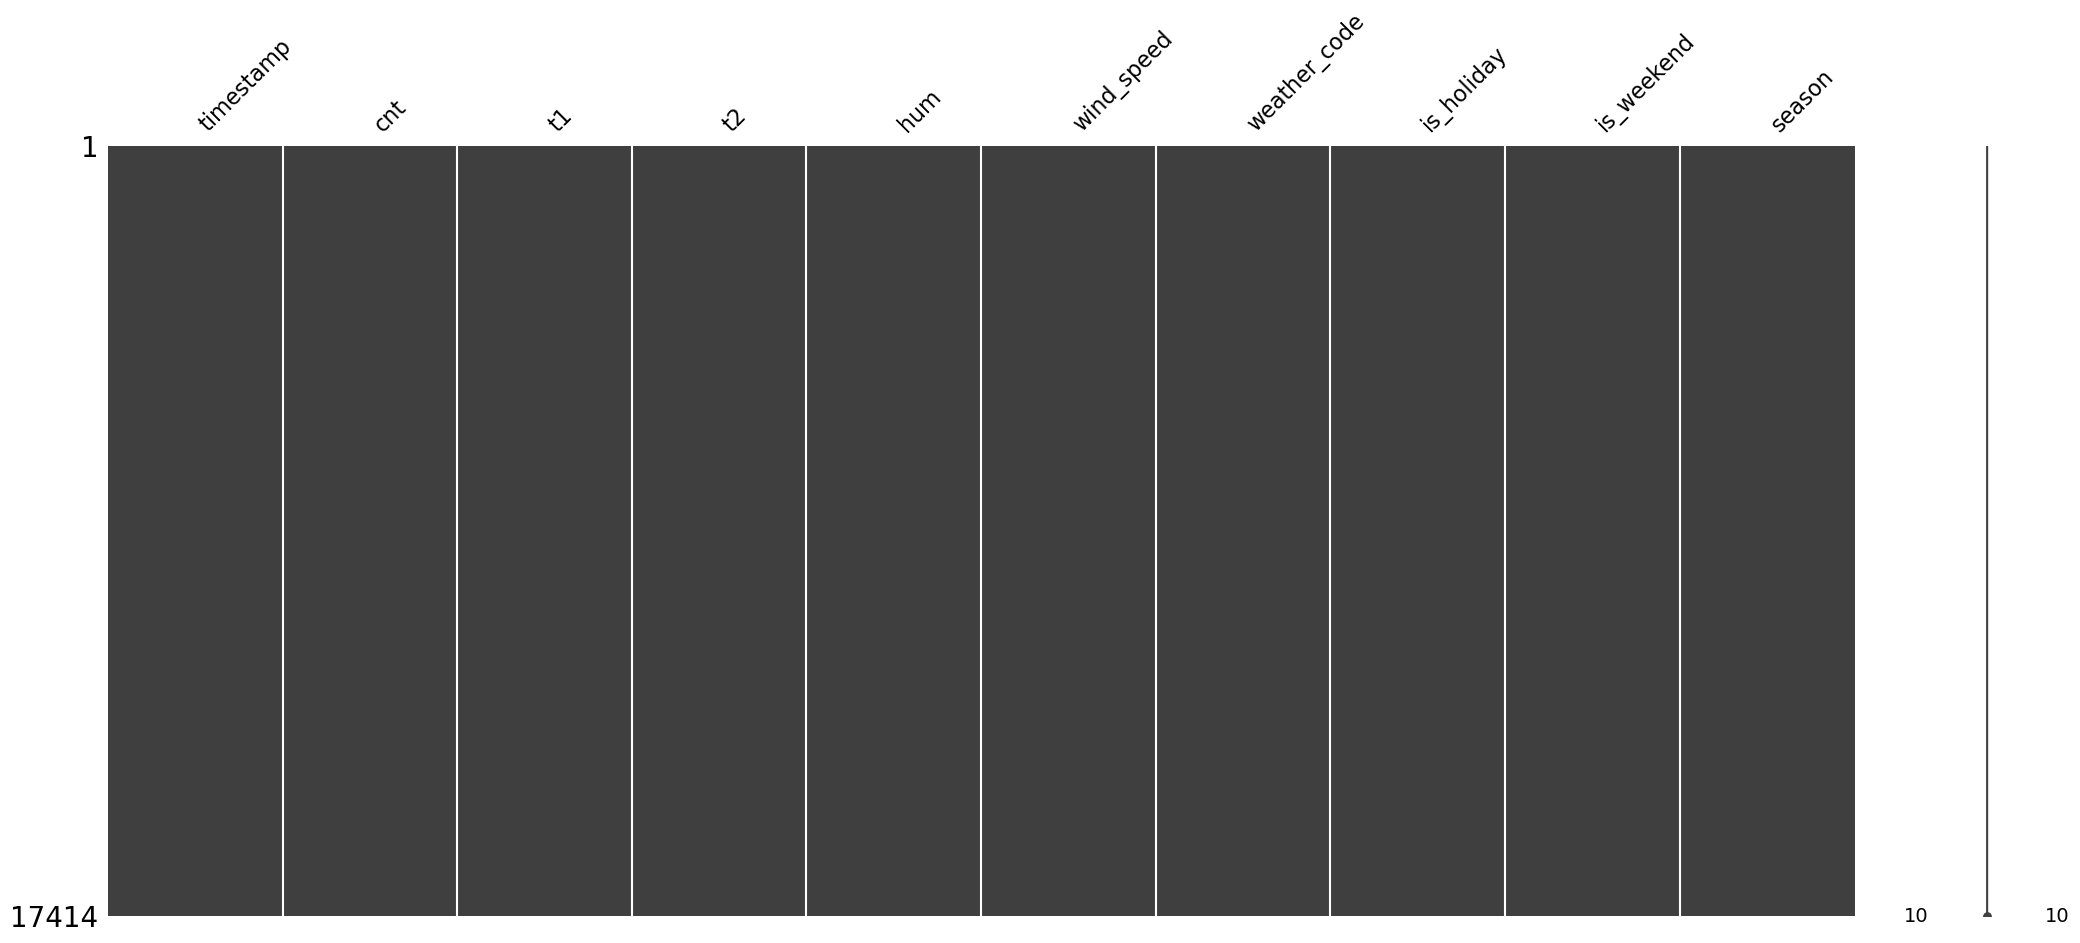

In [16]:
msno.matrix(df)
plt.show()

In [17]:
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['hour'] = df['timestamp'].dt.hour
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,dayofweek,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,6,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,6,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,6,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,6,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,6,4


In [18]:
df['year'].value_counts()

2016    8699
2015    8643
2017      72
Name: year, dtype: int64

In [19]:
df['month'].value_counts()

5     1488
1     1487
8     1484
12    1484
7     1481
10    1479
3     1468
4     1438
11    1430
6     1422
9     1394
2     1359
Name: month, dtype: int64

In [20]:
df['dayofweek'].value_counts()

0    2508
6    2505
1    2505
3    2492
2    2489
5    2465
4    2450
Name: dayofweek, dtype: int64

In [21]:
df['weather_code'].value_counts()

1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: weather_code, dtype: int64

D:\python\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='cnt'>

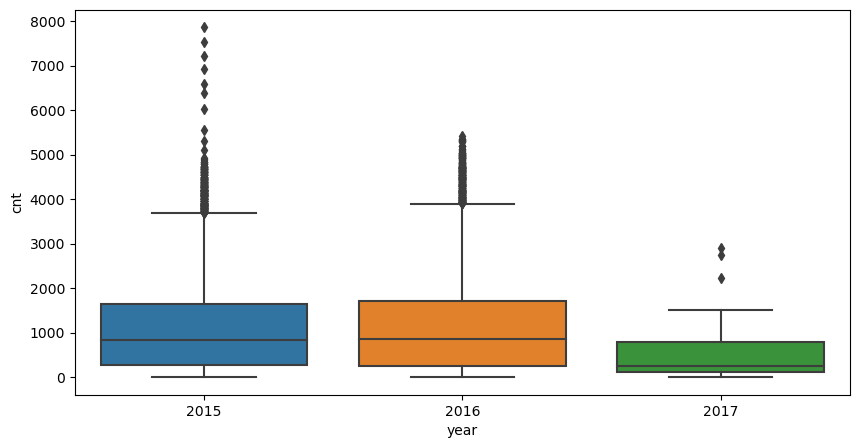

In [24]:
a, b = plt.subplots(1,1, figsize=(10,5))
sns.boxplot(df['year'], df['cnt'])

D:\python\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


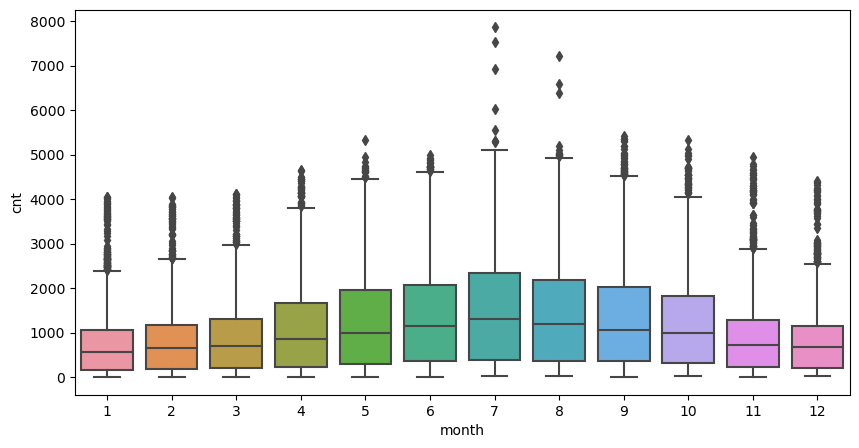

In [26]:
a, b = plt.subplots(1,1, figsize=(10,5))
sns.boxplot(df['month'], df['cnt'])
plt.show()

D:\python\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hour', ylabel='cnt'>

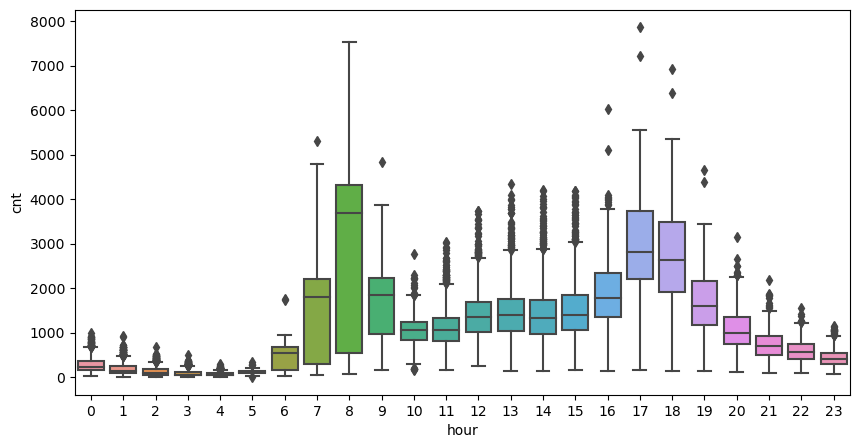

In [27]:
a, b = plt.subplots(1,1, figsize=(10,5))
sns.boxplot(df['hour'], df['cnt'])

In [32]:
# 그래프 함수 만들기
def plot_bar(data,feature):
    fig = plt.figure(figsize=(12,3))
    sns.barplot(x=feature, y='cnt', data=data, palette='Set3')

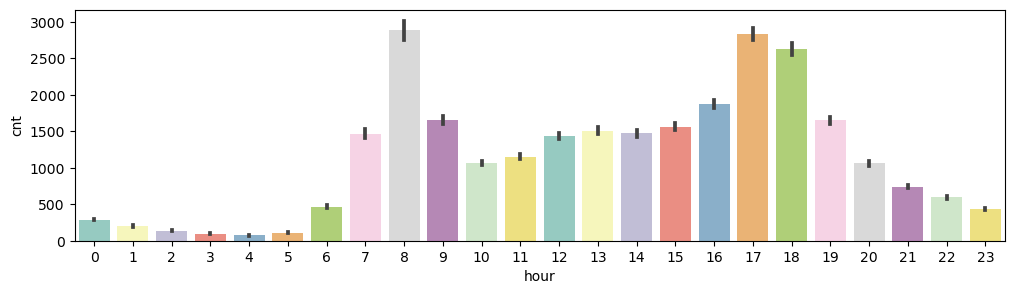

In [33]:
plot_bar(df, 'hour')

## 2. 이상치 제거

In [34]:
def is_outliers(s):
    lower_limit = s.mean() - (s.std()*3)
    upper_limit = s.mean() + (s.std()*3)d
    return ~s.between(lower_limit, upper_limit)

In [35]:
df_out = df[~df.groupby('hour')['cnt'].apply(is_outliers)]

In [40]:
df.shape[0] - df_out.shape[0]

149

## 3. 범주형 처리

In [41]:
df_out.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
year                     int64
month                    int64
dayofweek                int64
hour                     int64
dtype: object

In [43]:
df_out['weather_code'] = df_out['weather_code'].astype('category')
df_out['season'] = df_out['season'].astype('category')
df_out['year'] = df_out['year'].astype('category')
df_out['month'] = df_out['month'].astype('category')
df_out['hour'] = df_out['hour'].astype('category')

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_19024\3387782137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out['weather_code'] = df_out['weather_code'].astype('category')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_19024\3387782137.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out['season'] = df_out['season'].astype('category')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_19024\3387782137.py:3: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [44]:
df_out.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code          category
is_holiday             float64
is_weekend             float64
season                category
year                  category
month                 category
dayofweek                int64
hour                  category
dtype: object

## 4. 더미처리 - 이진의 수로 만들어줌

In [45]:
df_out = pd.get_dummies(df_out, columns=['weather_code','season','year','month','hour'])
df_out.head()

,timestamp,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,dayofweek,weather_code_1.0,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,0.0,1.0,6,0,...,0,0,0,0,0,0,0,0,0,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,0.0,1.0,6,1,...,0,0,0,0,0,0,0,0,0,0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,0.0,1.0,6,1,...,0,0,0,0,0,0,0,0,0,0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,0.0,1.0,6,1,...,0,0,0,0,0,0,0,0,0,0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,0.0,1.0,6,1,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df_out.shape

(17265, 59)

## 5. 종속변수, 독립변수 분리

In [48]:
df_y = df_out['cnt']
df_x = df_out.drop(['timestamp','cnt'], axis=1)
df_y.head()

0    182
1    138
2    134
3     72
4     47
Name: cnt, dtype: int64

## 6. 훈련, 테스트 데이터 분리

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, random_state=0, test_size=0.3, shuffle=False)

In [53]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(12085, 57)
(5180, 57)
(12085,)
(5180,)


# 딥러닝

In [54]:
# pip install keras

  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)
Note: you may need to restart the kernel to use updated packages.


In [56]:
pip install tensorflow

  Using cached tensorflow-2.11.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.11.0-cp39-cp39-win_amd64.whl (266.3 MB)
     ---------------------------------------- 23.2/23.2 MB 9.5 MB/s eta 0:00:00
  Using cached protobuf-3.19.6-cp39-cp39-win_amd64.whl (895 kB)
     ---------------------------------------- 3.7/3.7 MB 11.4 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 7.8 MB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
     ---------------------------------------- 1.5/1.5 MB 10.5 MB/s eta 0:00:00
  Using cached tensorflow_estimator-2.11.0-py2.py3-none-any.whl (439 kB)
  Using cached tensorboard-2.11.0-py3-none-any.whl (6.0 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     ------------------------------------- 177.8/177.8 kB 10.5 MB/s eta 0:00:00
  Using cached tensorboard_plugin_wi

In [57]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [58]:
model = Sequential()
model.add(Dense(units=160, activation='relu', input_dim=57))
model.add(Dense(units=60, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=1, activation='linear'))

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               9280      
                                                                 
 dense_1 (Dense)             (None, 60)                9660      
                                                                 
 dense_2 (Dense)             (None, 20)                1220      
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 20,181
Trainable params: 20,181
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.compile(loss='mae', optimizer='adam',metrics=['mae'])
early_stopping = EarlyStopping(monitor='loss',patience=5, mode='min')
history = model.fit(x_train, y_train, epochs=50, batch_size=1, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/50
10876/10876 [==============================] - 17s 1ms/step - loss: 515.8065 - mae: 515.8065 - val_loss: 448.7562 - val_mae: 448.7562
Epoch 2/50
10876/10876 [==============================] - 16s 1ms/step - loss: 322.9853 - mae: 322.9853 - val_loss: 341.6460 - val_mae: 341.6460
Epoch 3/50
10876/10876 [==============================] - 16s 1ms/step - loss: 252.8059 - mae: 252.8059 - val_loss: 294.1929 - val_mae: 294.1929
Epoch 4/50
10876/10876 [==============================] - 16s 1ms/step - loss: 220.4655 - mae: 220.4655 - val_loss: 221.2434 - val_mae: 221.2434
Epoch 5/50
10876/10876 [==============================] - 16s 1ms/step - loss: 198.2163 - mae: 198.2163 - val_loss: 210.3489 - val_mae: 210.3489
Epoch 6/50
10876/10876 [==============================] - 17s 2ms/step - loss: 182.1658 - mae: 182.1658 - val_loss: 174.5567 - val_mae: 174.5567
Epoch 7/50
10876/10876 [==============================] - 16s 1ms/step - loss: 168.6901 - mae: 168.6901 - val_loss: 183.6999 - val

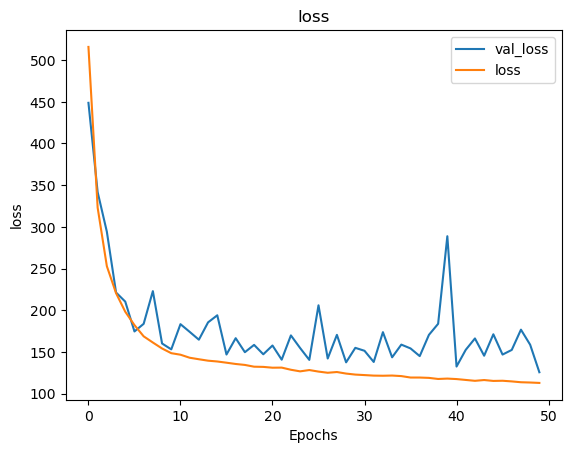

In [62]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['val_loss','loss'])
plt.show()

In [67]:
y_predict = model.predict(x_test)

162/162 [==============================] - 0s 1ms/step


## 머신러닝

In [68]:
from sklearn.metrics import mean_squared_error

In [65]:
def RMSE(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))

In [69]:
RMSE(y_test,y_predict)

258.84697047160773

### RFR

In [75]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=16)
rf.fit(x_train,y_train)
rf_result = rf.predict(x_test)
print('RMSE',RMSE(y_test,rf_result))

RMSE 303.6417775662534


### xgBoost

In [78]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100, random_state=16)
xgb.fit(x_train, y_train)
xgb_result = xgb.predict(x_test)
print('RMSE',RMSE(y_test,xgb_result))

RMSE 307.09072320247844


In [79]:
from lightgbm import LGBMRegressor
lgb = LGBMRegressor(n_estimators=100, random_state=16)
lgb.fit(x_train,y_train)
lgb_result = lgb.predict(x_test)
print('RMSE',RMSE(y_test,lgb_result))

RMSE 323.2746495922864


## 예측 모델별 비교

In [86]:
xgb = pd.DataFrame(xgb_result)
rf = pd.DataFrame(rf_result)
dnn = pd.DataFrame(y_predict)
lgb = pd.DataFrame(lgb_result)
compare = pd.DataFrame(y_test).reset_index(drop=True)

In [89]:
compare['xgb'] = xgb
compare['rf'] = rf
compare['dnn'] = dnn
compare['lgb'] = lgb
compare.head()

,cnt,xgb,rf,dnn,lgb
0,1885,1803.070923,1700.24,2301.538574,1830.345197
1,2175,2228.828125,1803.82,2523.264648,2133.296789
2,2485,2598.814697,2191.37,2725.073486,2590.899050
3,2882,2683.149658,2206.67,2659.158691,2613.783086
4,2965,2590.693848,2276.35,2696.088867,2306.341169


<AxesSubplot:xlabel='cnt', ylabel='Density'>

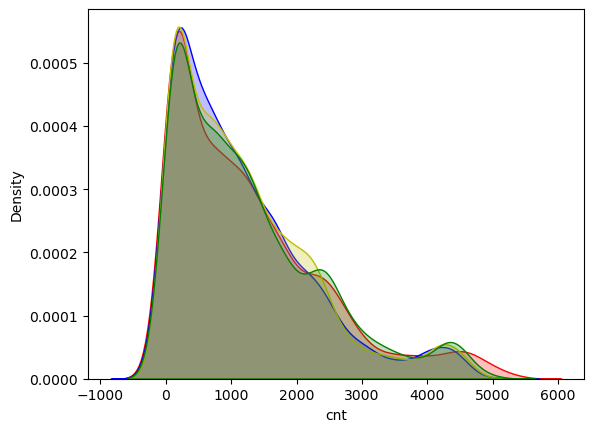

In [88]:
sns.kdeplot(compare['cnt'], shade=True, color='r')
sns.kdeplot(compare['xgb'], shade=True, color='b')
sns.kdeplot(compare['rf'], shade=True, color='y')
sns.kdeplot(compare['dnn'], shade=True, color='g')
# sns.kdeplot(compare['lgb'], shade=True, color='')